### Logistic Regression (Logit Regression)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv('bank-additional/bank-additional-full.csv', delimiter=';')
df_test = pd.read_csv('bank-additional/bank-additional.csv', delimiter=';')

In [9]:
# vấn đề là dự báo ai là người có khả năng đi gởi tiền nhất sau khi gọi điện

In [3]:
df_train.head(2)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_test.head(2)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [5]:
df_train.shape

(41188, 21)

In [6]:
df_test.shape

(4119, 21)

In [8]:
df_test.shape[0] / (df_test.shape[0] + df_train.shape[0]) * 100

9.091310393537423

Input variables:
# bank client data:
 - age (numeric)
 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
 - default: has credit in default? (categorical: 'no','yes','unknown')
 - housing: has housing loan? (categorical: 'no','yes','unknown')
 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
 - contact: contact communication type (categorical: 'cellular','telephone') 
 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
 - previous: number of contacts performed before this campaign and for this client (numeric)
 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
 - cons.price.idx: consumer price index - monthly indicator (numeric) 
 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
 - euribor3m: euribor 3 month rate - daily indicator (numeric)
 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
 - y - has the client subscribed a term deposit? (binary: 'yes','no')



In [12]:
#logistic regression dùng hàm sigmoid

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

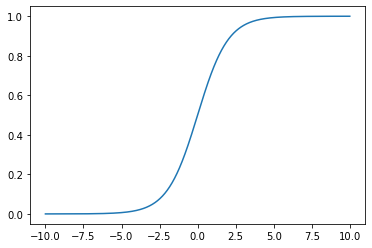

In [15]:
x = np.linspace(-10, 10, 1000)
y = sigmoid(x)
plt.plot(x,y)
plt.show()

In [19]:
pd.options.display.max_columns = 25
#show hết cột ko bị dấu ...

In [18]:
df_train.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
df_train.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [22]:
df_train.duplicated().sum()

12

In [23]:
df_train.drop_duplicates(inplace=True)

In [24]:
df_train.duplicated().sum()

0

In [27]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [28]:
macro_df = df_train.iloc[:, -5:-1]
macro_df.head(2)

,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,93.994,-36.4,4.857,5191.0
1,93.994,-36.4,4.857,5191.0


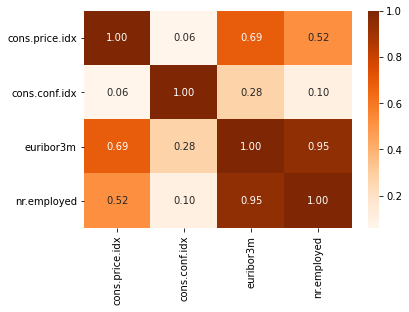

In [29]:
#correalation
sns.heatmap(macro_df.corr(), annot=True, fmt='.2f', cmap='Oranges');

In [31]:
df_train.iloc[:, :-6].describe()

,age,duration,campaign,pdays,previous
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013
std,10.42068,259.305321,2.770318,186.937102,0.494964
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


In [32]:
df_train.columns 

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [33]:
np.unique(df_train.y, return_counts=True)

(array(['no', 'yes'], dtype=object), array([36537,  4639]))

In [34]:
df_train.y.value_counts()

no     36537
yes     4639
Name: y, dtype: int64

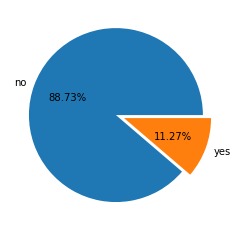

In [39]:
plt.pie(x=df_train.y.value_counts().values, explode=[0, 0.1],
        labels=['no', 'yes'], autopct='%0.2f%%');

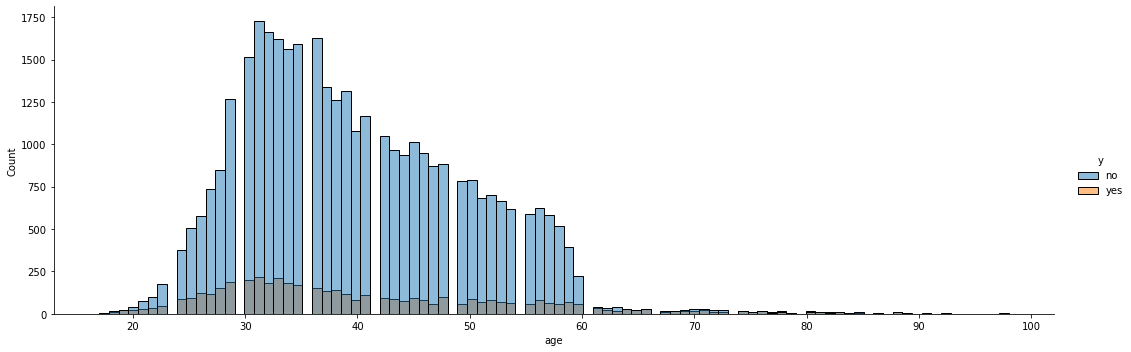

In [43]:
sns.displot(data=df_train, x='age', hue='y', aspect=3);

In [80]:
df_train.query("age" > 60').groupby('y').count()['age'].plot(kind='pie', autopct='%0.2f%%');

SyntaxError: invalid syntax (<ipython-input-80-adbfccaf8d3d>, line 1)

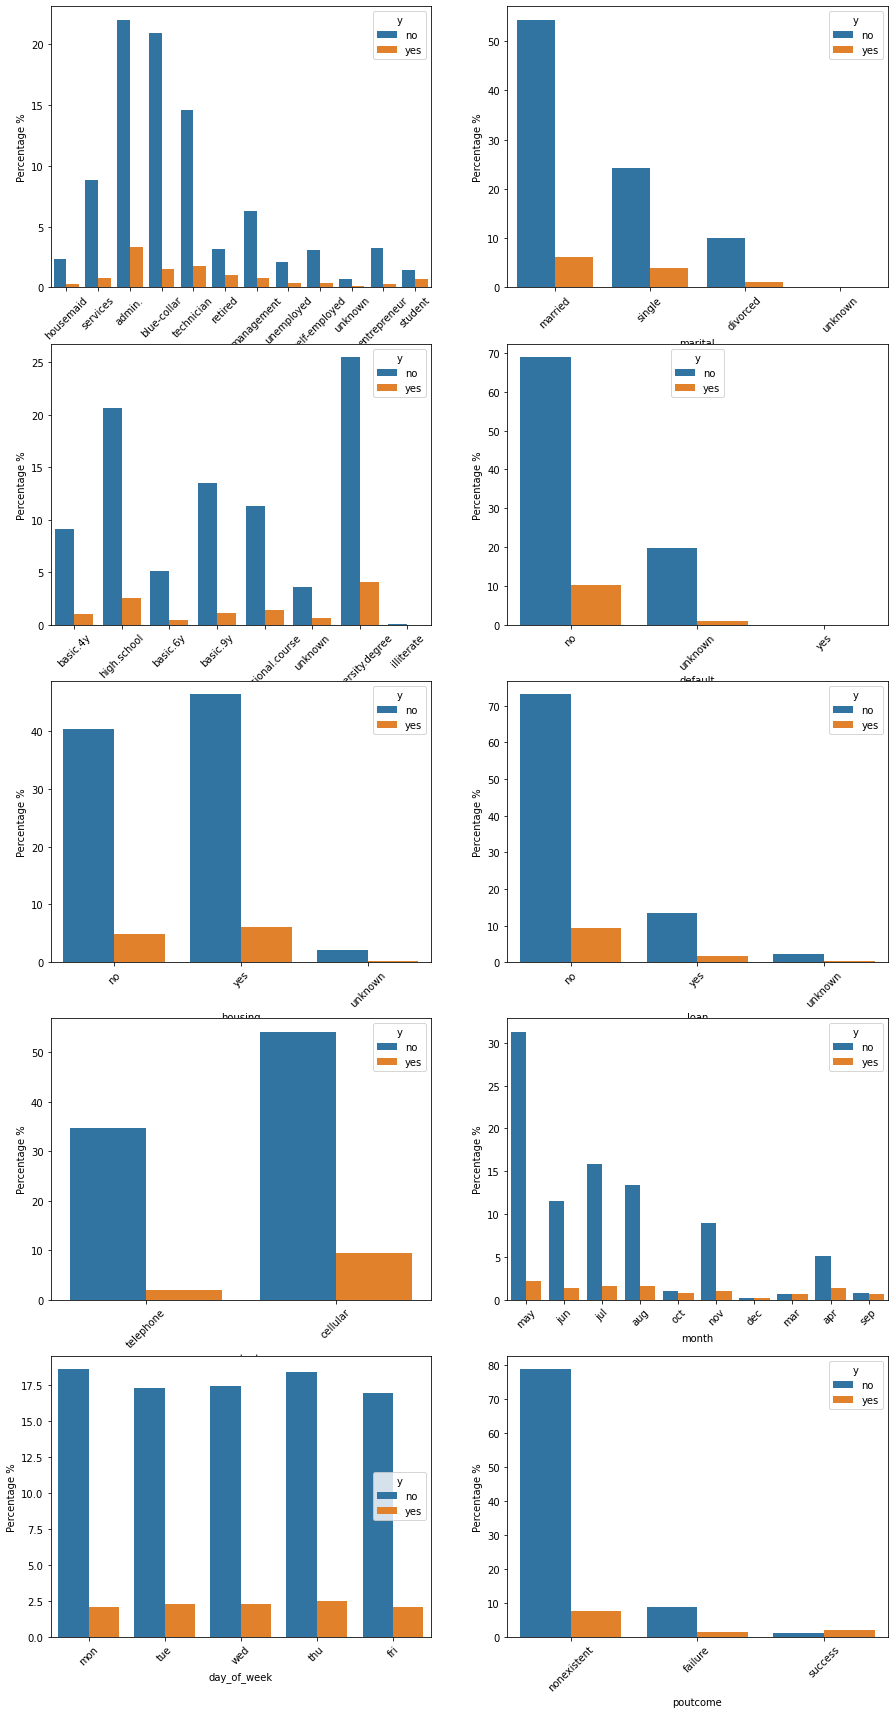

In [60]:
fig, axes = plt.subplots(5, 2, figsize=(15, 30))
index = 0 
for i in range(5):
    for j in range(2):
        sns.barplot(x=columns[index], y='age', hue='y', data=df_train, 
                    estimator=lambda x : len(x)/len(df_train)*100, ax=axes[i,j])
        index += 1
        axes[i,j].set(ylabel='Percentage %')
        axes[i,j].tick_params(axis='x', rotation=45)
plt.show()

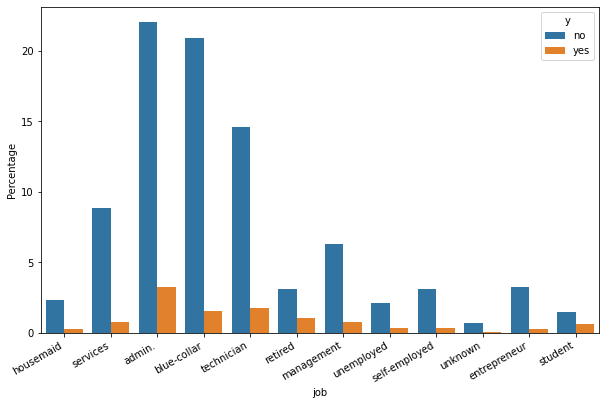

In [50]:
plt.subplots

plt.figure(figsize=(10,6))
sns.barplot(x='job', y='age', hue='y', data=df_train, estimator=lambda x : len(x)/len(df_train)*100)
plt.ylabel('Percentage %')
plt.xticks(rotation=30, ha='right');

In [52]:
df_train.groupby(['y', 'job']).job.count().to_frame() / df_train.shape[0]*100

job
y   job                     
no  admin.         22.022537
    blue-collar    20.922382
    entrepreneur    3.234894
    housemaid       2.316884
    management      6.304643
    retired         3.118321
    self-employed   3.089178
    services        8.849815
    student         1.457160
    technician     14.593452
    unemployed      2.112881
    unknown         0.711580
yes admin.          3.281037
    blue-collar     1.549446
    entrepreneur    0.301146
    housemaid       0.257432
    management      0.796581
    retired         1.054012
    self-employed   0.361861
    services        0.784438
    student         0.667865
    technician      1.772877
    unemployed      0.349718
    unknown         0.089858

In [61]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Pipeline

In [112]:
def preprocessing(df):
    train_cols = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'y']
    df = df_train[train_cols]
    df['age'] = np.where(df.age >= 60, 1, 0)
    df['y'] = np.where(df.y == 'no', 0, 1)

    df_one_hot = pd.get_dummies(df[['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome']])
    df.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome'], inplace=True)

    df_final = pd.concat([df_onehot, df], axis= 1)


    return df_final

In [118]:
def get_result(X_train, y_train, X_test, y_test, threshold=0.5):
    logistic = LogisticRegression()
    logistic.fit(X_train, y_train)
    
    predicted_proba = logistic.predict_proba(X_test)
    predicted_results = np.where(predicted_proba[:, 1] > threshold, 1, 0)
    
    print(classification_report(y_test, predicted_results))
    return predicted_proba, predicted_results

In [120]:
df_train = preprocessing('bank-additional/bank-additional-full.csv')
df_test = preprocessing('bank-additional/bank-additional.csv')

X_train, y_train = df_train.iloc[:, :1], df_train.iloc[:, -1]
X_test, y_test = df_train.iloc[:, :1], df_train.iloc[:, -1]

predicted_proba, predicted_results = get_result(X_train, y_train, X_test, y_test)

KeyError: "['marital', 'education', 'job', 'month', 'housing', 'poutcome', 'default', 'loan', 'contact'] not in index"

In [114]:
df_train.shape, df_test.shape

((41176, 57), (4119, 21))

In [68]:
df_train.query('previous >= 1')[['previous', 'y']].groupby('y').agg(['min', 'mean', 'median', 'max', 'std', 'count']) 

previous                                     
         min      mean median max       std count
y                                                
no         1  1.172564      1   7  0.513369  4126
yes        1  1.525017      1   6  0.846658  1499

In [69]:
df_train.query('previous >= 1')[['campaign', 'y']].groupby('y').agg(['min', 'mean', 'median', 'max', 'std', 'count']) 

campaign                                     
         min      mean median max       std count
y                                                
no         1  2.024237      2  16  1.540687  4126
yes        1  1.772515      1  10  1.124264  1499

In [72]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no


/Users/stephaniebui/opt/anaconda3/envs/lanhuong/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
#chuyển sang dạng số 



KeyError: "None of [Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',\n       'month', 'poutcome'],\n      dtype='object')] are in the [columns]"

/Users/stephaniebui/opt/anaconda3/envs/lanhuong/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
df_final.head(2)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,...,poutcome_failure,poutcome_nonexistent,poutcome_success,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,999,0,1.1,93.994,-36.4,4.857,0
1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,999,0,1.1,93.994,-36.4,4.857,0


In [106]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   job_admin.                     41176 non-null  uint8  
 1   job_blue-collar                41176 non-null  uint8  
 2   job_entrepreneur               41176 non-null  uint8  
 3   job_housemaid                  41176 non-null  uint8  
 4   job_management                 41176 non-null  uint8  
 5   job_retired                    41176 non-null  uint8  
 6   job_self-employed              41176 non-null  uint8  
 7   job_services                   41176 non-null  uint8  
 8   job_student                    41176 non-null  uint8  
 9   job_technician                 41176 non-null  uint8  
 10  job_unemployed                 41176 non-null  uint8  
 11  job_unknown                    41176 non-null  uint8  
 12  marital_divorced               41176 non-null 